# classification

In [ ]:
!python --version
import tensorflow as tf
print(tf. __version__)
import keras
print(tf. __version__)

Python 3.7.15
2.9.2
2.9.2


In [1]:
import numpy as np
import keras
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf
import random

In [ ]:
total_data = pd.read_csv("/content/drive/MyDrive/speech signal processing project/20%.csv", header = None)

In [ ]:
print(total_data.shape)

(7501, 109)


In [ ]:
total_data[108].value_counts()

0    1501
1    1500
2    1500
3    1500
4    1500
Name: 108, dtype: int64

In [ ]:
total_data.iloc[:,-1]

0       1
1       2
2       2
3       2
4       2
       ..
7496    3
7497    0
7498    4
7499    0
7500    3
Name: 108, Length: 7501, dtype: int64

In [ ]:
print(total_data.head)

<bound method NDFrame.head of             0         1          2         3         4         5         6    \
0      0.000000  1.000000   2.000000  3.000000  4.000000  5.000000  6.000000   
1     -4.787092  1.252998  -7.845068 -7.133953 -0.441570  4.983495  1.551949   
2     -0.909017  2.593528  -4.744590 -3.175269  5.404186 -0.252440  7.355714   
3    -10.164921  9.937468  -6.863588 -4.793267 -4.973449  1.171341  6.023141   
4     -0.175701  3.722354  -3.096726 -9.260858 -0.398950  3.644411  6.263383   
...         ...       ...        ...       ...       ...       ...       ...   
7496   5.370382  1.623610  -1.529862  1.738684  8.375121 -8.384691 -2.639871   
7497   2.739514  1.066396  13.453405  0.715636  1.588882 -1.503378  0.661087   
7498 -10.057369 -2.840546   4.995772  3.454686  7.780161 -1.298497  1.368219   
7499   1.129327  2.817191   9.699430 -1.886736 -5.656891 -3.393476  1.802960   
7500  -1.015623  1.747762  -7.359754  2.702334  0.725701 -5.835339  2.540170   

         

In [ ]:
y = total_data.iloc[:,-1]
print(y)

0       1
1       2
2       2
3       2
4       2
       ..
7496    3
7497    0
7498    4
7499    0
7500    3
Name: 108, Length: 7501, dtype: int64


In [ ]:
X = total_data.iloc[:, :-1]

In [ ]:
print(X.head)

<bound method NDFrame.head of             0         1          2         3         4         5         6    \
0      0.000000  1.000000   2.000000  3.000000  4.000000  5.000000  6.000000   
1     -4.787092  1.252998  -7.845068 -7.133953 -0.441570  4.983495  1.551949   
2     -0.909017  2.593528  -4.744590 -3.175269  5.404186 -0.252440  7.355714   
3    -10.164921  9.937468  -6.863588 -4.793267 -4.973449  1.171341  6.023141   
4     -0.175701  3.722354  -3.096726 -9.260858 -0.398950  3.644411  6.263383   
...         ...       ...        ...       ...       ...       ...       ...   
7496   5.370382  1.623610  -1.529862  1.738684  8.375121 -8.384691 -2.639871   
7497   2.739514  1.066396  13.453405  0.715636  1.588882 -1.503378  0.661087   
7498 -10.057369 -2.840546   4.995772  3.454686  7.780161 -1.298497  1.368219   
7499   1.129327  2.817191   9.699430 -1.886736 -5.656891 -3.393476  1.802960   
7500  -1.015623  1.747762  -7.359754  2.702334  0.725701 -5.835339  2.540170   

         

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(1501, 108)
(1501,)
(6000, 108)
(6000,)


In [ ]:
X_train = np.resize(X_train, (X_train.shape[0], 108,1))
X_test = np.resize(X_test, (X_test.shape[0], 108,1))

In [ ]:
from tensorflow.keras import utils 
y_train = utils.to_categorical(y_train, 5) # to convert label data into categories

In [3]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Flatten, Dense, Dropout, Activation

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 54, 512)           28672     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 5, 512)           0         
 1D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 5, 512)           2048      
 hNormalization)                                                 
                                                                 
 conv1d_3 (Conv1D)           (None, 3, 256)            3277056   
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1, 256)           0         
 1D)                                                             
                                                      

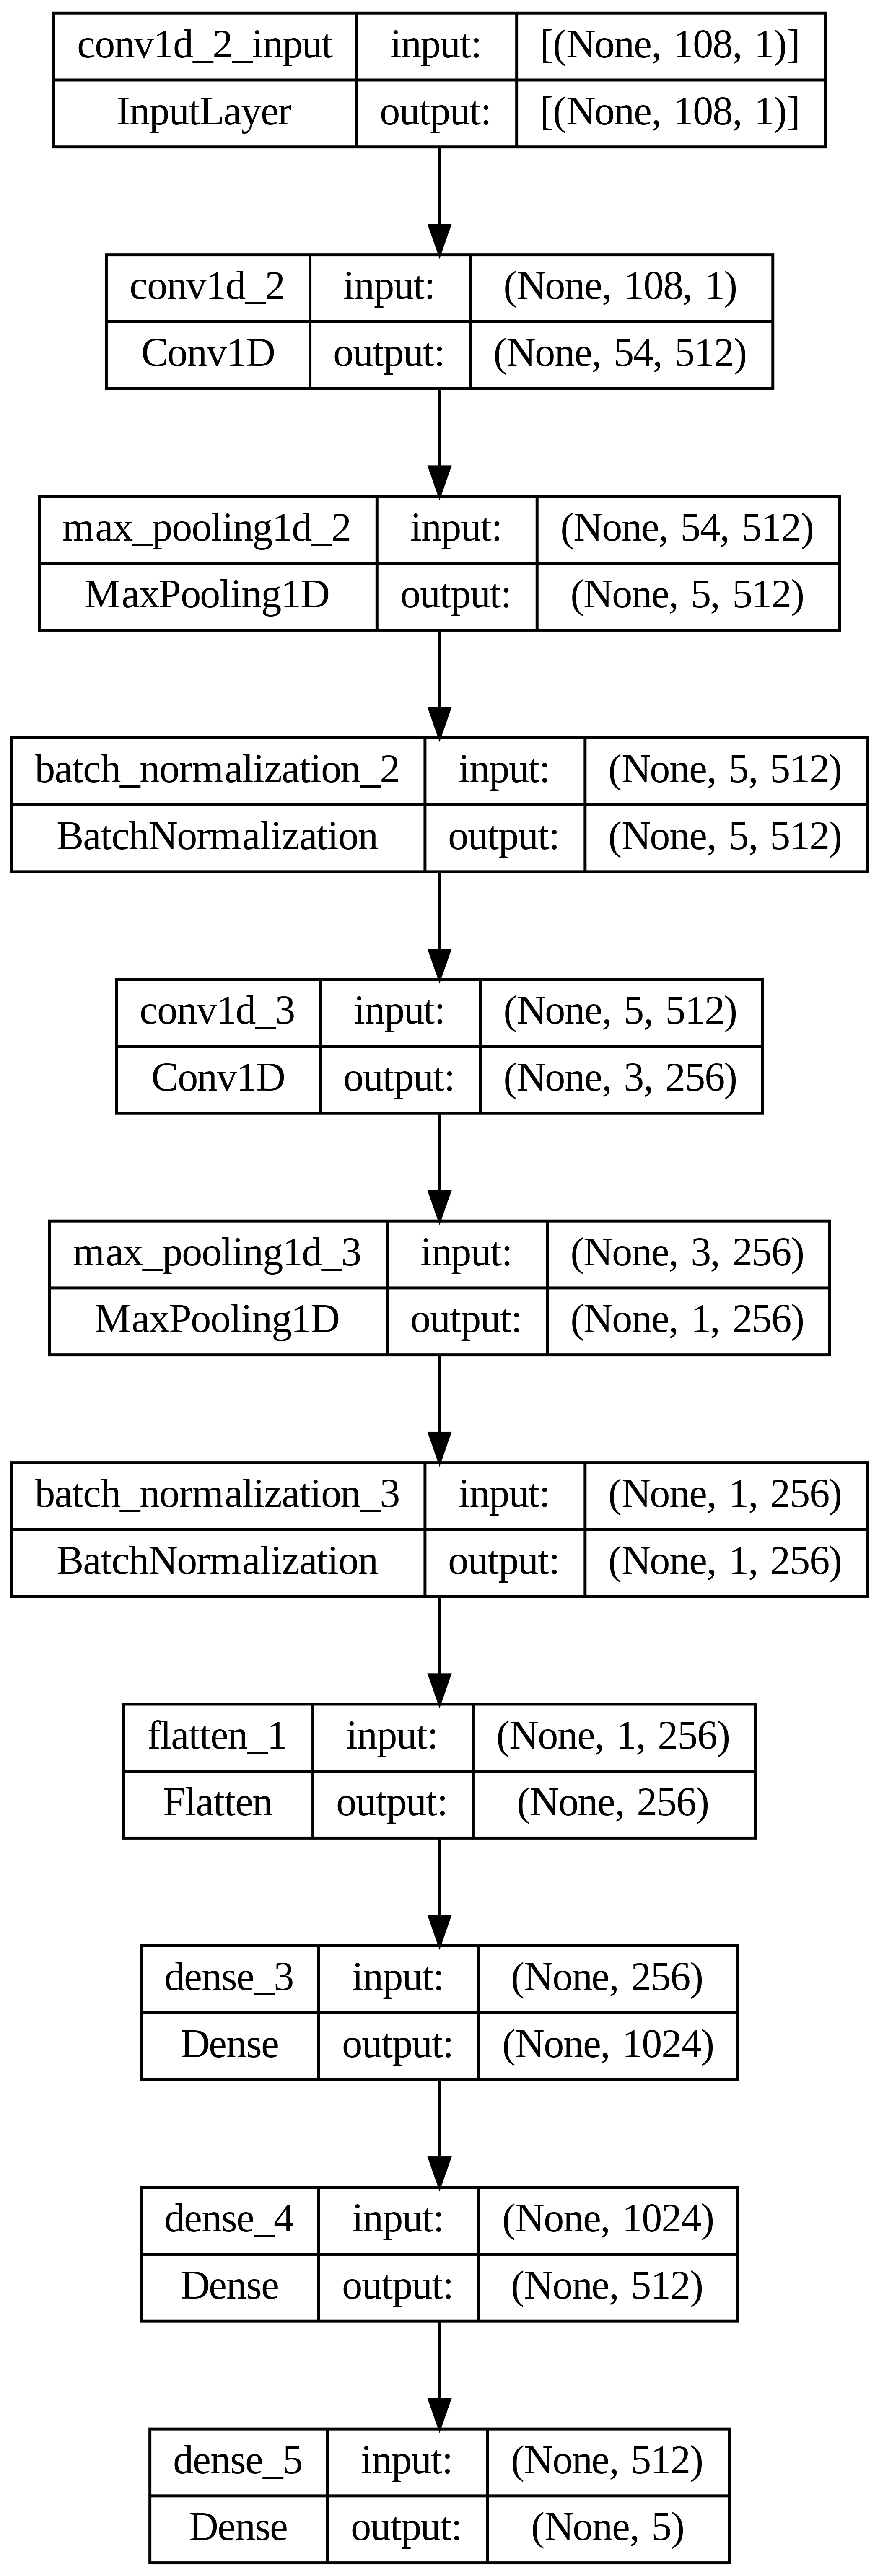

In [5]:
model = Sequential()
model.add(Conv1D(512, 55, activation='relu', padding="same", strides = 2, input_shape=(108,1)))
model.add(MaxPooling1D(10))
model.add(BatchNormalization())
#model.add(Dropout(0.3))
model.add(Conv1D(256, 25, activation='relu', padding="same", strides = 2))
model.add(MaxPooling1D(3))
model.add(BatchNormalization())

#model.add(GlobalAveragePooling1D())
model.add(Flatten())
model.add(Dense(1024, kernel_initializer='normal' , activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(512, kernel_initializer='normal', activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(5, kernel_initializer='normal', activation='softmax'))

print(model.summary())

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', dpi = 500, show_shapes=True, show_layer_names=True)

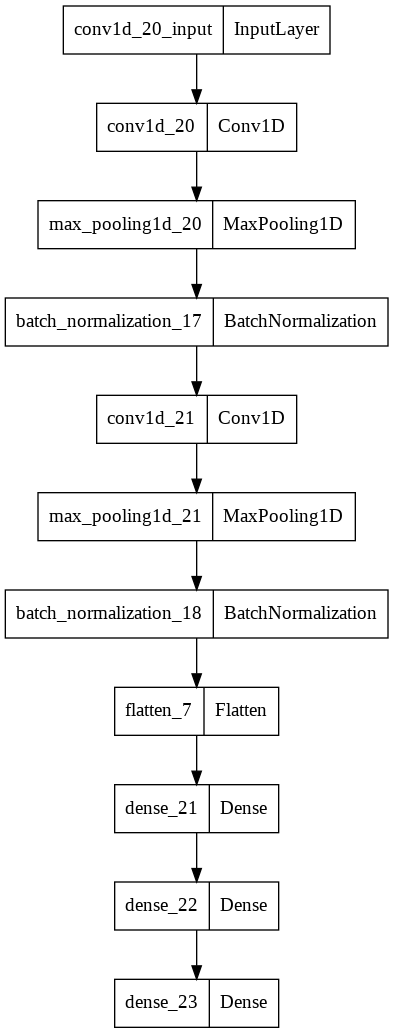

In [ ]:
mod_ifg = tf.keras.utils.plot_model(model)
tf.keras.utils.plot_model(model)

In [ ]:
from  tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
rlp = lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 2,verbose = 1,factor = 0.8, min_lr = 1e-6)
es = EarlyStopping(verbose=1, patience=2)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['AUC'])

In [ ]:
his = model.fit(X_train, y_train, epochs = 100, batch_size = None, validation_split=0.2, callbacks = [lrd,es]) #callbacks=[lrd,es]

Epoch 1/100
150/150 [==============================] - 103s 681ms/step - loss: 0.3725 - auc: 0.9817 - val_loss: 0.5571 - val_auc: 0.9606 - lr: 0.0010
Epoch 2/100
150/150 [==============================] - 101s 676ms/step - loss: 0.0704 - auc: 0.9985 - val_loss: 0.0964 - val_auc: 0.9983 - lr: 0.0010
Epoch 3/100
150/150 [==============================] - 103s 689ms/step - loss: 0.0650 - auc: 0.9983 - val_loss: 0.0388 - val_auc: 0.9998 - lr: 0.0010
Epoch 4/100
150/150 [==============================] - 103s 688ms/step - loss: 0.0321 - auc: 0.9996 - val_loss: 0.0533 - val_auc: 0.9989 - lr: 0.0010
Epoch 5/100
150/150 [==============================] - ETA: 0s - loss: 0.0351 - auc: 0.9991
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
150/150 [==============================] - 103s 688ms/step - loss: 0.0351 - auc: 0.9991 - val_loss: 0.0560 - val_auc: 0.9988 - lr: 0.0010
Epoch 5: early stopping


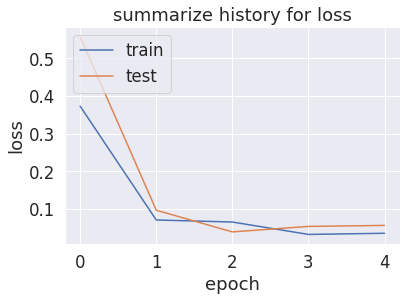

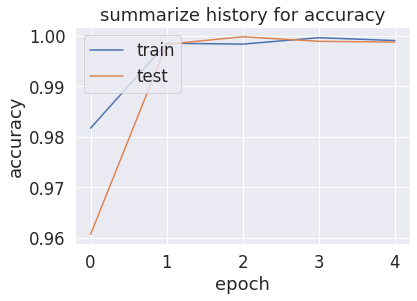

In [ ]:
from matplotlib import pyplot as plt
# summarize history for loss
plt.plot(his.history['loss'], label='Train loss') # from history varaiable plot trianing loss values
plt.plot(his.history['val_loss'], label='Validation (Test) loss') # from history varaible plot validation loss
plt.title('summarize history for loss') # title of graph
plt.ylabel('loss') # y axis label
plt.xlabel('epoch') # x axies label
plt.legend(['train', 'test'], loc='upper left') # specify colour of graph with its name
plt.show() # show graph

# summarize history for accuracy
plt.plot(his.history['auc']) # # from history varaiable plot trianing accuracy values
plt.plot(his.history['val_auc']) # # from history varaiable plot validation accuracy values
plt.title('summarize history for accuracy') # title of graph
plt.ylabel('accuracy') # y axis label
plt.xlabel('epoch') # x axis label
plt.legend(['train', 'test'], loc='upper left') # specify colour with its names
plt.show() # show graph

In [ ]:
model.save('/content/drive/MyDrive/speech processing/weight20%.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/speech processing/weight20%.h5')

In [ ]:
y_predicted = model.predict(X_test) # now pass test data and predict values

In [ ]:
print(y_predicted)

[[7.54862506e-10 2.44224552e-08 3.88477376e-04 2.39053115e-08
  9.99611557e-01]
 [2.45013689e-06 1.08562324e-06 8.92931780e-07 9.99988675e-01
  6.86470776e-06]
 [4.04050486e-04 2.32081555e-04 2.13056246e-05 9.99342024e-01
  5.29852343e-07]
 ...
 [9.98532176e-01 4.84627719e-07 9.46735527e-05 2.30616555e-04
  1.14211545e-03]
 [1.40668685e-03 1.01227277e-04 1.23977825e-05 9.98478830e-01
  8.33134322e-07]
 [2.64375672e-06 9.99996781e-01 2.95294143e-07 3.94026159e-07
  2.36514215e-12]]


In [ ]:
y_predicted = np.argmax(y_predicted, axis=1)

In [ ]:
print(y_predicted)

[4 3 3 ... 0 3 1]


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns

In [ ]:

def _show_confusion_matrix(validations, predictions):
    LABELS = ["class 1",
          "class 2",
          "class 3",
          "class 4",
          "class 5"]
    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(7, 5))
    sns.set(font_scale=1.5)
    sns.heatmap(matrix,
                cmap=(sns.color_palette("viridis")),
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    plt.title("model", fontsize=18)
    plt.ylabel("True Label", fontsize=18)
    plt.xlabel("Predicted Label", fontsize=18)
    plt.show()

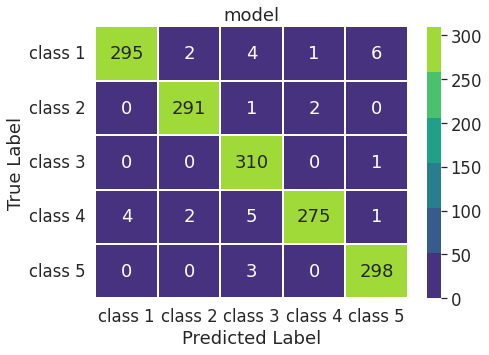

In [ ]:
_show_confusion_matrix(y_test, y_predicted)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print("precision: %.3f " % precision_score(y_test, y_predicted, pos_label='positive', average='micro'))
print("recall: %.3f " % recall_score(y_test, y_predicted, pos_label='positive', average='micro'))
print("f1_score: %.3f " % f1_score(y_test, y_predicted, pos_label='positive', average='micro'))
print("accuracy_score: %.3f " % accuracy_score(y_test, y_predicted))

precision: 0.979 
recall: 0.979 
f1_score: 0.979 
accuracy_score: 0.979 
